# Trabalho #5 - Classificação de Múltiplas Classes

Nesse trabalho você vai desenvolver uma rede neural tipo densa usando a plataforma TensorFlow-Keras para realizar uma tarefa de classificação de múltiplas classes.

A tarefa de classificação desse trabalho consiste na identificação de tipos de vestuários a partir de imagens.

## Coloque aqui o seu nome

Nome: Bruno Rodrigues Silva


Em primeiro lugar é necessário importar alguns pacotes do Python que serão usados nesse trabalho:
- Numpy pacote de cálculo científico com Python
- Matplotlib biblioteca para gerar gráficos em Python
- TensorFlow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

## 1 - Visão geral do problema ##

O objetivo desse problema é determinar o tipo de vestuário que é mostrado em uma imagem usando uma RNA. Assim, esse problema consiste em dada uma imagem, a RNA avalia a probabilidade de existirem determinados tipos de vestuário na imagem e determina qual o tipo mais provável entre dez possíveis.

O banco de dados usado nesse exemplo é o Fashion-MNIST, que consiste de imagens de artigos de vestuário da Zalando. Esse banco de dados pode ser obtido no link https://github.com/zalandoresearch/fashion-mnist. 

Algumas dessas imagens estão mostradas na figura abaixo.

<img src="Fashion_MNIST.png">


## 2 - Dados de treinamento

Características dos dados:

- O banco de dados Fashion MNIST possui 60.000 exemplos de treinamento e 10.000 exemplos de teste;
- Cada exemplo consiste de uma imagem em tons de cinza, de dimensão 28x28 pixels;
- Cada imagem é associada a um rótulo de 10 classes;
- O valor da intensidade luminosa de cada pixel da imagem é um número inteiro entre 0 e 255.

As possíveis classes (rótulos) presentes nas imagens são as seguintes:

    0 – camiseta;
    1 – calça;
    2 – pulôver;
    3 – vestido;
    4 – casaco;
    5 – sandália;
    6 – camisa;
    7 – tênis.
    8 – bolsa;
    9 – bota de cano curto.


### 2.1 - Leitura dos dados

O Keras já possui esse banco de dados e para usá-lo basta importá-lo com um comando. Assim, execute o código da célula abaixo para carregar os dados.

Observe que usando 60.000 exemplos demora muito para treinar aRNA, então, nesse trabalho usaremos somente 10.000 exemplos de treinamento, 2.000 exemplos de validação e 2.000 exemplos de teste. E todos esses exemplos serão extraídos do conjunto de treinamento.

In [2]:
# Importa bancos de dados do Keras
from tensorflow.keras.datasets import fashion_mnist

# Carrega dados da Fashion-MNIST em tenores
(X_train_orig, Y_train_orig), (xx, yy) = fashion_mnist.load_data()

print("X_train shape:", X_train_orig.shape, "y_train shape:", Y_train_orig.shape)

4423680/4422102 [==============================] - 6s 1us/step
X_train shape: (60000, 28, 28) y_train shape: (60000,)


Note que no código acima, `xx` e `yy` são as variáveis de entrada e de saída do conjunto de exemplos de teste original, que nesse trabalho não serão usados. 

Pela dimensão dos tensores dos dados de treinamento temos 60.000 imagens de treinamento com dimensão de 28 por 28 pixels.

Execute a célula a seguir para visualizar um exemplo de uma imagem do banco de dados com a sua classe. Altere o valor da variável `index` e execute a célula novamente para visualizar mais exemplos diferentes.

y = 9


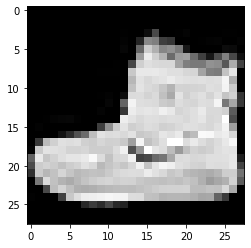

In [3]:
# Exemplo de uma imagem
index = 0
plt.imshow(X_train_orig[index], cmap='gray')
print ("y = " + str(np.squeeze(Y_train_orig[index])))

### 2.2 - Processamento dos dados

Para os dados poderem ser usados por uma RNA devemos primeiramente processá-los.

Para isso devemos realizar as seguintes etapas:

- Dividir aleatóriamente os dados nos conjuntos de treinamento, validação e teste;
- Os valores dos pixels nas imagens é um número inteiro que deve ser transformados em números reais para serem usados nos cálculos;
- Redimensionar as imagens para transformá-las em um vetor linha;
- Normalizar as imagens de forma que os valores dos pixels fiquem entre 0 e 1.

### Exercício #1: Conjuntos de treinamento e validação

Na célula abaixo crie um código para para dividir o conjunto de treinamento nos conjuntos de treinamento, validação e teste. Use 10.000 exemplos para o conjunto de treinamento e 2.000 exemplos para cada um dos conjunto de validação e teste. Não se esqueça de separar também as classes.

Para selecionar os exemplos de cada um dos conjuntos, utilize o vetor de índices `ind`, que consiste de números inteiros de 0 a 59.999, ordenados de forma aleatória. Dessa forma, pegue os primeiros 10.000 elementos em `ind` para os exemplos de treinamento, os elementos de 10.000 a 12.000 para os exemplos de validação e os elementos de 12.000 a 14.000 vara os exemplos de teste.

In [14]:
# PARA VOCÊ FAZER: Divisão dos dados de treinamento em dados de treinamento e validação

# Gera vetor de indíces (números inteiros) de 0 a 59.999 com ordenamento aletório
ind = np.random.randint(60000, size=60000)

# Dados de entrada
### COMECE AQUI ### (≈ 3 linhas)
X_train = X_train_orig[ind[:10000]]
X_val   = X_train_orig[ind[10000:12000]]
X_test  = X_train_orig[ind[12000:14000]]
### TERMINE AQUI ###

# Dados de saída
### COMECE AQUI ### (≈ 3 linhas)
Y_train= Y_train_orig[ind[:10000]]
Y_val = Y_train_orig[ind[10000:12000]]
Y_test=Y_train_orig[ind[12000:14000]]
### TERMINE AQUI ###

# Acerta dimensões dos vetores de saída
Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_val = Y_val.reshape((Y_val.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1))

print("Dimensão do tensor de dados de entrada de treinamento =", X_train.shape)
print("Dimensão do tensor de dados de entrada de validação =", X_val.shape)
print("Dimensão do tensor de dados de saída de treinamento =", Y_train.shape)
print("Dimensão do tensor de dados de saída de validação =", Y_val.shape)
print("Dimensão do tensor de dados de saída de test =", Y_test.shape)

Dimensão do tensor de dados de entrada de treinamento = (10000, 28, 28)
Dimensão do tensor de dados de entrada de validação = (2000, 28, 28)
Dimensão do tensor de dados de saída de treinamento = (10000, 1)
Dimensão do tensor de dados de saída de validação = (2000, 1)
Dimensão do tensor de dados de saída de test = (2000, 1)


**Saída esperada:**

    Dimensão do tensor de dados de entrada de treinamento = (10000, 28, 28)
    Dimensão do tensor de dados de entrada de validação = (2000, 28, 28)
    Dimensão do tensor de dados de saída de treinamento = (10000, 1)
    Dimensão do tensor de dados de saída de validação = (2000, 1)
    Dimensão do tensor de dados de saída de test = (2000, 1)

### Exercício #2: Normalização e redimensionameto dos dados de entrada

Na célula abaixo crie um código para normalizar e transformar as imagens em números reais, dividindo por 255. Após essa operação, deve-se redimensionar os dados de entrada para ficarem na forma de vetor linha de dimensão `num_px * num_px`.

In [17]:
# PARA VOCÊ FAZER: Normalização dos dados de entrada

# Guarda dimensão das imagens
num_px = X_train.shape[1]
print("Numero de colunas e linhas das imagens de entrada=", num_px)

# Transformação dos dados em números reais
### Comece AQUI ### (≈ 3 linhas)
X_train_float = X_train/255.
X_val_float   = X_val/255.
X_test_float  = X_test/255.
### TERMINE AQUI ###

# Redimensionamento dos dados de entrada
### COMECE AQUI ### (≈ 6 linhas)
m_train = 10000
X_train_flat= X_train_float.reshape(m_train, -1)
m_test = 2000
X_test_flat = X_test_float.reshape(m_test, -1)
m_val = 2000
X_val_flat = X_val_float.reshape(m_val, -1)
### TERMINE AQUI ###

# Dimensão dos tensores de dados
print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train_flat.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_test_flat.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test_flat.shape)

# Para verificar se os resultados estão corretos
print("Alguns elementos da primeira imagem de treinamento = ", X_train_flat[14,10:15])
print("Alguns elementos da primeira imagem de validação = ", X_val_flat[14,10:15])
print("Alguns elementos da primeira imagem de teste = ", X_test_flat[14,10:15])

Numero de colunas e linhas das imagens de entrada= 28
Dimensão dos dados de entrada do conjunto de treinamento:  (10000, 784)
Dimensão dos dados de entrada do conjunto de validação:  (2000, 784)
Dimensão dos dados de entrada do conjunto de teste:  (2000, 784)
Alguns elementos da primeira imagem de treinamento =  [0. 0. 0. 0. 0.]
Alguns elementos da primeira imagem de validação =  [0.         0.46666667 0.6        0.48235294 0.58823529]
Alguns elementos da primeira imagem de teste =  [0.         0.         0.05098039 0.         0.        ]


**Saída esperada:**

    Numero de colunas e linhas das imagens de entrada= 28
    Dimensão dos dados de entrada do conjunto de treinamento:  (10000, 784)
    Dimensão dos dados de entrada do conjunto de validação:  (2000, 784)
    Dimensão dos dados de entrada do conjunto de teste:  (2000, 784)
    Alguns elementos da primeira imagem de treinamento =  [0.13333334 0.         0.         0.         0.        ]
    Alguns elementos da primeira imagem de validação =  [0.         0.         0.827451   0.8980392  0.85490197]
    Alguns elementos da primeira imagem de teste =  [0.04705882 0.34117648 0.05098039 0.         0.00784314]


### Exercício #3: Codificação das classes

As classes das imagens são identificadas por um número inteiro que varia de 0 a 9. Porém, a saída esperada de uma RNA para um problema de classificação de múltiplas classes é um vetor de dimensão igual ao número de classes, que no caso são 9 classes. Cada elemento desse vetor representa a probabilidade da imagem ser uma classe. Assim, devemos transformar as saídas reais do conjunto de dados em um vetor linha de 9 elementos, com todos os elementos iguais a zero a menos do correspondente ao da classe da imagem, que deve ser igual a um.

A função que realiza essa transformação é conhecida na literatura de "one-hot-encoding”, que no Keras é chamada de `to_categorical`. Essa função pertence à classe de utilidades do Keras que deve ser importada antes de ser utilizada. 

Implemente na célula abaixo a transformação dos dados de saída usando a função `to_categorical` do keras.

In [18]:
# PARA VOCÊ FAZER: Coficação das classes dos exemplos 

# Importa classe de utilidades do Keras
from tensorflow.keras.utils import to_categorical

# Transformação das classes de números reais para vetores
### COMECE AQUI ### (≈ 3 linhas)
Y_train_hot = to_categorical(Y_train)
Y_val_hot = to_categorical(Y_val)
Y_test_hot = to_categorical(Y_test)
### Termine AQUI ###

# Dimensão dos dados
print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_val_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test_hot.shape)

# Para verificar se os resultados estão corretos
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de treinamento = ", Y_train[:5].T)
print("Primeiras 5 saídas dos exemplos de treinamento = ", Y_train_hot[:5,:])
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de validação = ", Y_val[:5].T)
print("Primeiras 5 saídas dos exemplos de validação = ", Y_val_hot[:5,:])
print(' ')
print("Primeiras 5 classes numéricas dos exemplos de teste = ", Y_test[:5].T)
print("Primeiras 5 saídas dos exemplos de teste = ", Y_test_hot[:5,:])

Dimensão dos dados de saída do conjunto de treinamento:  (10000, 10)
Dimensão dos dados de saída do conjunto de validação:  (2000, 10)
Dimensão dos dados de saída do conjunto de teste:  (2000, 10)
 
Primeiras 5 classes numéricas dos exemplos de treinamento =  [[6 0 3 6 5]]
Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
 
Primeiras 5 classes numéricas dos exemplos de validação =  [[4 0 9 4 1]]
Primeiras 5 saídas dos exemplos de validação =  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
 
Primeiras 5 classes numéricas dos exemplos de teste =  [[4 8 7 9 6]]
Primeiras 5 saídas dos exemplos de teste =  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0.

**Saída esperada:**

    Dimensão dos dados de saída do conjunto de treinamento:  (10000, 10)
    Dimensão dos dados de saída do conjunto de validação:  (2000, 10)
    Dimensão dos dados de saída do conjunto de teste:  (2000, 10)
     
    Primeiras 5 classes numéricas dos exemplos de treinamento =  [[1 6 7 5 8]]
    Primeiras 5 saídas dos exemplos de treinamento =  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
     
    Primeiras 5 classes numéricas dos exemplos de validação =  [[8 7 7 5 9]]
    Primeiras 5 saídas dos exemplos de validação =  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
     
    Primeiras 5 classes numéricas dos exemplos de teste =  [[1 7 2 0 2]]
    Primeiras 5 saídas dos exemplos de teste =  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
     [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
     [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
        
**Visualização da entrada e saída correspondente**

Execute a célula abaixo para verificar se o seu programa está realizando de fato o que você espera. No código abaixo `index` é o número sequencial da imagem. Tente trocar a imagem, mudando a variável `index`, usando valores entre 0 e 59.999, para visualizar outros exemplos.

Classe numérica:  [4] , Vetor de saída correspondentes:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


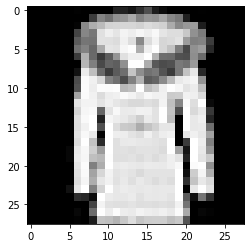

In [19]:
# Exemplo de saída
index = 100
print("Classe numérica: ", Y_train[index], ", Vetor de saída correspondentes: ", Y_train_hot[index])
plt.imshow(X_train[index], cmap='gray', vmin=0, vmax=255)

**Saída esperada:**

    Classe numérica:  [2] , Vetor de saída correspondentes:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

## 3 - Criação e treinamento da RNA

Nesse trabalho você irá usar uma RNA com camadas do tipo densa.

### Exercício #4: Criação e configuração da RNA

Você vai usar uma RNA com 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios `n1`, função de ativação ReLu;
- Segunda camada: número de neurônios `n2`, função de ativação ReLu;
- Camada de saída: número de neurônio `n3`, função de ativação softmax;
- Regularização L2 na primeira e segunda camadas.

Na célula abaixo crie uma função que recebe a dimensão dos dados de entrada, os números de neurônios das 3 camadas e o parâmetro de regularização e configura a RNA de acordo com as características acima.

In [22]:
# PARA VOCÊ FAZER: Função para configuração da RNA

# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def build_model(data_shape, lamb, n1, n2, n3):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    lamb = parãmetro de regularização L2
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída
       
    Retorna: modelo da rede neural
    """

    # Instanciação do modelo
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈ 3 linhas)
    model.add(layers.Dense(n1, activation='relu', input_shape=data_shape, kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.Dense(n2, activation='relu', kernel_regularizer=regularizers.l2(lamb)))
    model.add(layers.Dense(n3, activation='softmax'))
    ### TERMINE AQUI ###
    
    return model

Defina os números de neurônios das camadas intermediárias e de saída e crie a RNA usando a função `build_model` criada na célula anterior. Utilize `n1 = 64`, `n2 = 32`, `n3 = 10` e `lamb = 0.0002`. Após criar a RNA utilize o método `summary` para visualizar a sua rede.

In [23]:
# PARA VOCÊ FAZER: criação da RNA

# Dimensão dos dados de entrada
#### COMECE AQUI ### (≈ 1 linhas) 
data_shape = (28*28,)
### TERMINE AQUI ###

# Definição dos números de neurônios das camadas e parâmetro de regularização
#### COMECE AQUI ### (≈ 4 linhas)
n1 = 64
n2 = 32
n3 = 10
lamb = 2e-4
### TERMINE AQUI ###

# Cria rede neural deep learning e apresenta sua configuração
#### COMECE AQUI ### (≈ 2 linhas)
rna = build_model(data_shape, lamb, n1,n2,n3)
rna.summary()
### TERMINE AQUI ###


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

    Model: "sequential_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 64)                50240     
    _________________________________________________________________
    dense_1 (Dense)              (None, 32)                2080      
    _________________________________________________________________
    dense_2 (Dense)              (None, 10)                330       
    =================================================================
    Total params: 52,650
    Trainable params: 52,650
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #5: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização Adam. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- taxa de aprendizado = 0,01;
- Tamanho do lote = 256;
- número de épocas = 100.

**Importante:** Escolha o parâmetro `verbose=0` no método `fit` para evitar de imprimir os resultados das 100 épocas de treinamento.

In [24]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otimizador
### COMECE AQUI ### (≈ 2 linhas)
opt = optimizers.Adam(lr=0.01)
rna.compile(opt, loss='categorical_crossentropy', metrics='accuracy')
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
history = rna.fit(X_train_flat, Y_train_hot, epochs=100, batch_size=256, validation_data=(X_val_flat, Y_val_hot))
### TERMINE AQUI ###

Epoch 1/100
40/40 [==============================] - 0s 11ms/step - loss: 1.0520 - accuracy: 0.6270 - val_loss: 0.7359 - val_accuracy: 0.7465
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.8035 - val_loss: 0.6946 - val_accuracy: 0.7755
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.8226 - val_loss: 0.5804 - val_accuracy: 0.8055
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5279 - accuracy: 0.8269 - val_loss: 0.6330 - val_accuracy: 0.7760
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5028 - accuracy: 0.8412 - val_loss: 0.6024 - val_accuracy: 0.7955
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4644 - accuracy: 0.8535 - val_loss: 0.5091 - val_accuracy: 0.8345
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.8647 - val_loss: 0.6435 - val_accuracy: 0.8145
Epoch 8/100


Epoch 59/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3354 - accuracy: 0.9037 - val_loss: 0.5236 - val_accuracy: 0.8580
Epoch 60/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.9133 - val_loss: 0.5126 - val_accuracy: 0.8610
Epoch 61/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 0.9223 - val_loss: 0.6356 - val_accuracy: 0.8180
Epoch 62/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.8994 - val_loss: 0.6167 - val_accuracy: 0.8245
Epoch 63/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8954 - val_loss: 0.6117 - val_accuracy: 0.8480
Epoch 64/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3383 - accuracy: 0.9079 - val_loss: 0.6383 - val_accuracy: 0.8430
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.9124 - val_loss: 0.6208 - val_accuracy: 0.8300
Epoch 

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

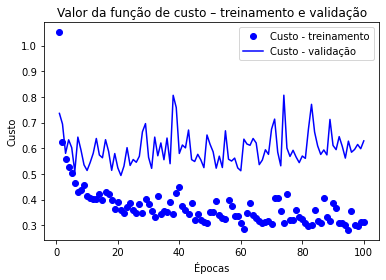

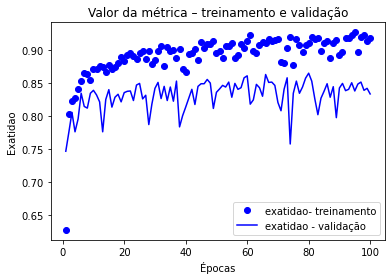

In [25]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores 
custo = history_dict['loss']
acc = history_dict['accuracy']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento diminui constantemente ao longo do treinamento e estabiliza em um valor de cerca de 0,4.
- O valor do custo para os dados de validação diminui até por volta da época 20 e depois estabiliza em um valor de cerca de 0,6, o que representa um resultado não muito bom.
- A exatidão obtida para os dados de treinamento é de 90%, enquanto que para os dados de validação é de cerca de 85%.

O grafico da função de custo durante o treinamento e os valores obtidos para a função de custo e para a métrica no final do treinamento mostram claramente que está ocorrendo um pouco de overfitting dos dados de treinamento.

### Exercício #6: Cálculo do custo e métrica

Modifique a célula abaixo para calcular o custo e a exatidão para os dados de treinamento, validação e teste.

In [26]:
# PARA VOCÊ FAZER: calculo do custo e a exatidão para os dados de treinamento, validação e teste

# Usando o método evaluate calcule o custo e a exatidão
### COMECE AQUI ### (≈ 3 linhas)
custo_e_metricas_train = rna.evaluate(X_train_flat, Y_train_hot)
custo_e_metricas_val = rna.evaluate(X_val_flat, Y_val_hot)
custo_e_metricas_test = rna.evaluate(X_test_flat, Y_test_hot)
### TERMINE AQUI ###

print('Dados de treinamento: ', custo_e_metricas_train)
print('Dados de validação: ', custo_e_metricas_val)
print('Dados de teste: ', custo_e_metricas_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.5507 - accuracy: 0.8445
Dados de treinamento:  [0.3634116053581238, 0.8942000269889832]
Dados de validação:  [0.6288926005363464, 0.8335000276565552]
Dados de teste:  [0.5506948828697205, 0.8445000052452087]


**Exemplo de saída esperada:**

    313/313 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.8686
    63/63 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.8260
    63/63 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.8285
    Dados de treinamento:  [0.46621835231781006, 0.8686000108718872]
    Dados de validação:  [0.6347703337669373, 0.8259999752044678]
    Dados de teste:  [0.659702718257904, 0.828499972820282]

### Ponto extra

**Será que é possível melhorar os resultados?** 

Tente alterar os números de neurônios das primeira e segunda camadas e o parâmetro de regularização (`lamb`) para ver se consegue resultados melhores.

Se fizer esse trabalho extra inclua o seu código e resultados abaixo dessa célula.

## 4 - Teste da RNA

### Exercício #7: Verificação dos resultados

Na célula abaixo calcule a previsões da sua RNA para as imagens dos dados de teste e depois verifique se algumas dessas previsões estão corretas. 

Note que a previsão da RNA é um vetor de 9 elementos com as probabilidades da imagem mostrar os 10 tipos de vestuários. Para detereminar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 9, que representa o vestuário sendo mostrado. Para fazer essa transformação use a função numpy `argmax(Y_prev, axis=?)`, onde `Y_prev` é o tensor com as saídas previstas pela RNA. Em qual eixo você deve calcular o índice da maior probabilidade?

Troque a variável index (variando entre 0 e 1999) para verificar se a sua RNA consegue classificar corretamente o tipo de vestuário mostrado nas imagens.

y = 3


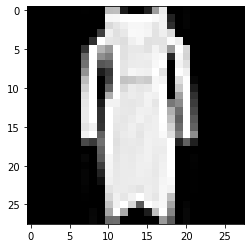

In [33]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA com dropout

# Calculo das previsões da RNA
### COMECE AQUI ### (≈ 1 linha)
Y_prev = rna.predict(X_test_flat) 
### TERMINE AQUI ###

# Cálculo das classes previstas
### COMECE AQUI ### (≈ 1 linha)
classe = np.argmax(Y_prev, axis=1)
### TERMINE AQUI ###

# Exemplo de uma imagem dos dados de teste
index = 51
plt.imshow(X_test[index], cmap='gray')
print ("y = " + str(np.squeeze(classe[index])))

**Saída esperada:**

    y = 8

### Exercício #8: Visualização dos resultados

Na célula abaixo crie um código para fazer um gráfico com as classes reais e as previstas pela sua RNA para todos os 150 primeiros exemplos do connjunto de teste.

Dimensão vetor classes reais=  (2000, 1)
Dimensão vetor classes previstas=  (2000,)


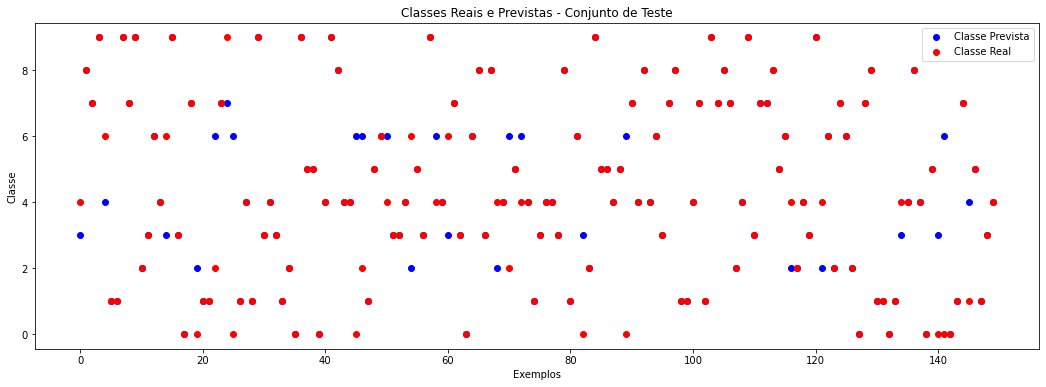

In [52]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA com dropout

# Resultado gráfico
# Verifique dimensoes dos vetores de classes reais e previstas
print('Dimensão vetor classes reais= ', Y_test.shape)
print('Dimensão vetor classes previstas= ', classe.shape)

# Fazer o gráfico das classes reais e previstas
plt.figure(figsize=(18, 6))
### COMECE AQUI ### (≈ 7 linhas)
plt.scatter(np.arange(0, 150, 1), classe[:150], c='blue', label='Classe Prevista')
plt.scatter(np.arange(0, 150, 1), Y_test[:150], c='red', label = 'Classe Real')
plt.xlabel("Exemplos")
plt.ylabel("Classe")
plt.title("Classes Reais e Previstas - Conjunto de Teste")
plt.legend();
### TERMINE AQUI ###


**Saída esperada:**

    Dimensão vetor classes reais=  (2000, 1)
    Dimensão vetor classes previstas=  (2000,)

<img src="classes_reais_previstas.png">

Note que cada bolinha azul mostrada no gráfico representa um erro de classificação.